# Neural Network : Regression Example

In this example i'm using my hand made NN to do Regression on a UCI Dataset.


[UCI : Computer Hardware Data Set](https://archive.ics.uci.edu/ml/datasets/Computer+Hardware)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

import sys
sys.path.append("..")
from neural_network.nn import NType, Dense, Dropout, ReLU, Sigmoid, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

The dataset is as follows:

In [13]:
columns = ["vendor", "model", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
df = pd.read_csv("../../dataset/cpu-performance-uci/machine.data", names=columns)
df.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


Turn categorical columns in numerical...

In [14]:
df_nn = df
df_nn["vendor"] = pd.Categorical(df["vendor"]).codes
df_nn["model"] = pd.Categorical(df["model"]).codes

df_nn.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,0,29,125,256,6000,256,16,128,198,199
1,1,62,29,8000,32000,32,8,32,269,253
2,1,63,29,8000,32000,32,8,32,220,253
3,1,64,29,8000,32000,32,8,32,172,253
4,1,65,29,8000,16000,32,8,16,132,132


### EDA

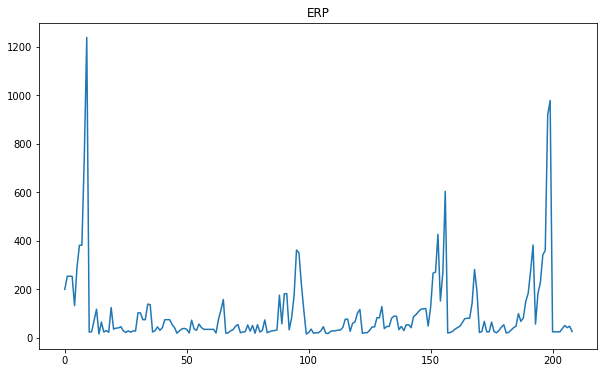

In [15]:
plt.figure(figsize=(10, 6))
plt.title("ERP")
plt.plot(df_nn["ERP"])
plt.show()

In [16]:
df_nn.corr()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor,1.000000,-0.127345,-0.080296,-0.083438,0.008180,0.005729,0.037202,-0.012555,-0.021662,-0.020321
model,-0.127345,1.000000,0.048600,-0.126972,-0.176645,-0.035492,-0.218127,-0.154152,-0.192771,-0.181206
MYCT,-0.080296,0.048600,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.083438,-0.126972,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,0.008180,-0.176645,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,0.005729,-0.035492,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,0.037202,-0.218127,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.012555,-0.154152,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.021662,-0.192771,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.020321,-0.181206,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


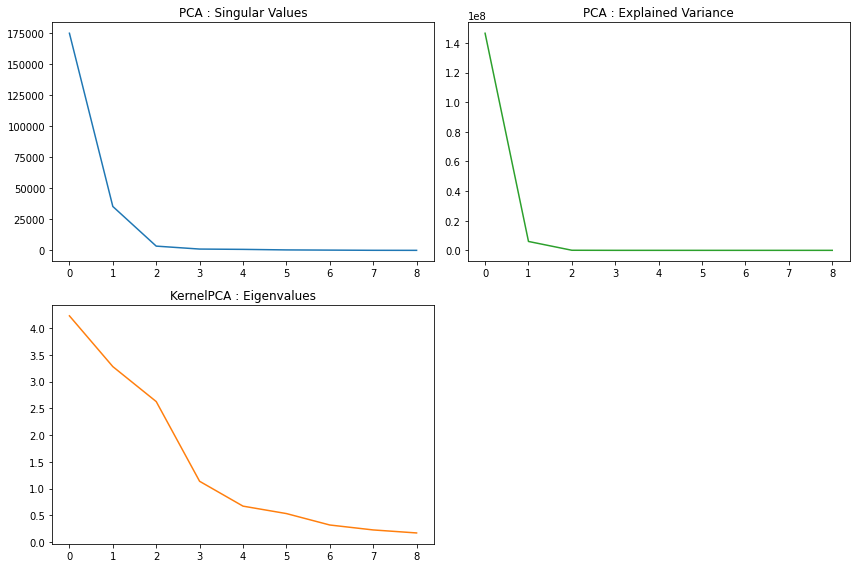

In [17]:
pca = PCA(n_components=9)
pca.fit_transform(df_nn[columns[:9]].to_numpy())

kpca = KernelPCA(n_components=9, kernel="rbf", n_jobs=-1)
kpca.fit_transform(MinMaxScaler().fit_transform(df_nn[columns[:9]].to_numpy()))

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("PCA : Singular Values")
plt.plot(pca.singular_values_)
plt.subplot(2, 2, 2)
plt.title("PCA : Explained Variance")
plt.plot(pca.explained_variance_, c="C2")
plt.subplot(2, 2, 3)
plt.title("KernelPCA : Eigenvalues")
plt.plot(kpca.lambdas_, c="C1")
plt.tight_layout()
plt.show()

### Normalization

In [18]:
X = df_nn[columns[:9]].to_numpy()
y = df_nn[columns[-1]].to_numpy().reshape(-1, 1)

y_scaler = MinMaxScaler()

X = MinMaxScaler().fit_transform(X)
y = y_scaler.fit_transform(y).ravel()

### Train / Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Neural Network : train and predict

Epoch 250/1000 =======> Loss: 0.00286 - MSLE: 0.05906
Epoch 500/1000 =======> Loss: 0.0019 - MSLE: 0.04632
Epoch 750/1000 =======> Loss: 0.00156 - MSLE: 0.04006
Epoch 1000/1000 =======> Loss: 0.00118 - MSLE: 0.03159
MSLE:  0.00153


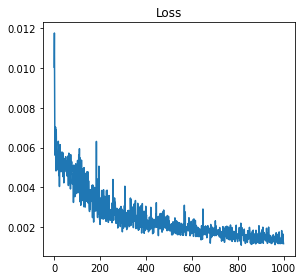

In [20]:
layers = (
    Dense(inputs=9, outputs=128, activation=ReLU),
    Dense(inputs=128, outputs=256, activation=ReLU),
    Dropout(inputs=256, outputs=128),
    Dense(inputs=128, outputs=1, activation=ReLU),
)

md = NeuralNetwork(layers, batch_size=32, ntype=NType.REGRESSION)
error = md.train(X_train.copy(), y_train.copy(), epochs=1000, show_iter_err=250)

y_pred = md.predict(X_test.copy())
print("MSLE: ", np.round(mean_squared_log_error(y_test.copy(), y_pred), 5))

if len(error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(error)), error)
    plt.tight_layout()
    plt.show()

### Evaluation

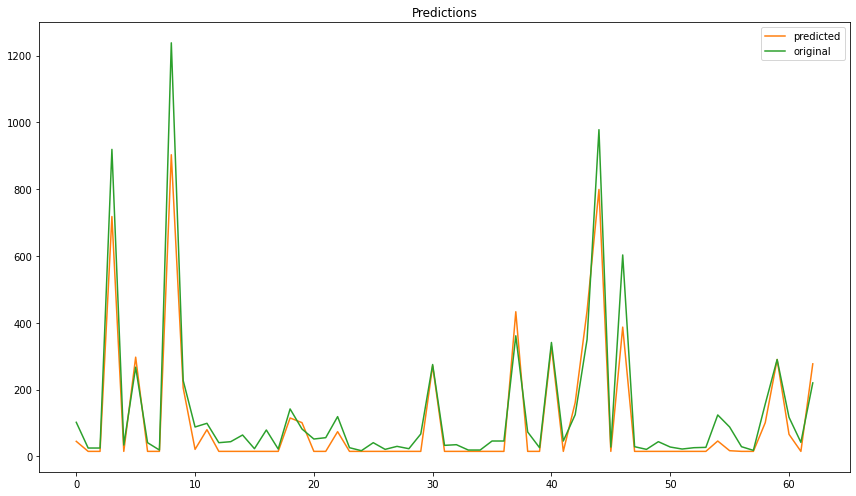

In [21]:
n_y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel().astype(np.int)
n_y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel().astype(np.int)

plt.figure(figsize=(12, 7))
plt.title("Predictions")
plt.plot(n_y_pred, label="predicted", c="C1")
plt.plot(n_y_test, label="original", c="C2")
plt.legend()
plt.tight_layout()
plt.show()